The case of dual-color co-rotating circular electric field.

In [1]:
%pylab
%matplotlib inline
import numpy as np
from scipy.fftpack import fft, fftshift

tl, tr = -1400, 1400
time = np.linspace(tl, tr, 2801) #nc=15 
dt = time[1] - time[0]
nt = len(time)
D_S0, D_S1, D_S2 = loadtxt('data/dipole_d_S1_term12.dat'),loadtxt('data/dipole_d_S2_term12.dat'),loadtxt('data/dipole_d_S3_term12.dat')
D_P0, D_P1, D_P2 = loadtxt('data/dipole_d_P1_term12.dat'),loadtxt('data/dipole_d_P2_term12.dat'),loadtxt('data/dipole_d_P3_term12.dat')
D_S, D_P = np.hstack((D_S0, D_S1, D_S2)), np.hstack((D_P0, D_P1, D_P2))

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [2]:
N = 420
pp_tds_S, pp_tds_P = zeros(N), zeros(N)
TDS_sum = zeros(N, dtype=complex)
pp_TDS_sum, angle_max_TDS_sum = zeros(N), zeros(N)
TDS_theta, TDS_abs = zeros((N,nt*21)), zeros((N,nt*21))
THG_S, THG_P = [[] for i in range(N)], [[] for i in range(N)]
THz_fre_S, THz_fre_P = [], []

for i in range(N):       #固定tau,30组
    mul = 10*time.size
    D_S_ext = np.pad(D_S[:,i], (mul, mul),'constant')
    D_P_ext = np.pad(D_P[:,i], (mul, mul),'constant')     #补零
    fre_S, fre_P = fft(D_S_ext), fft(D_P_ext)                 #傅里叶变换到频域
    fre_S_thz = zeros(D_S_ext.size, complex)
    fre_P_thz = zeros(D_P_ext.size, complex)   
    con_2 = int((0.0177)/(2*pi*(1/(len(D_S_ext)*dt))))   #0.0106394 对应70THz
    con_1 = con_2 + 1  
    fre_S_thz[0:con_1], fre_P_thz[0:con_1] = fre_S[0:con_1], fre_P[0:con_1]
    fre_S_thz[(D_S_ext.size-con_2):D_S_ext.size]=fre_S[(D_S_ext.size-con_2):D_S_ext.size]
    fre_P_thz[(D_P_ext.size-con_2):D_P_ext.size]=fre_P[(D_P_ext.size-con_2):D_P_ext.size]     #取其THz低频部分
    THz_fre_S.append(fre_S_thz[0:con_1])
    THz_fre_P.append(fre_P_thz[0:con_1])

    tds_S, tds_P = ifft(fre_S_thz).real, ifft(fre_P_thz).real                                 #逆傅里叶变换到时域，得到TDS
    tds=zeros(D_S_ext.size,dtype=complex)
    tds.real=tds_P
    tds.imag=tds_S
    tds_theta=angle(tds)
    tds_abs=abs(tds)
    TDS_theta[i,:]=tds_theta
    TDS_abs[i,:]=tds_abs

    pp_tds_S[i], pp_tds_P[i] = real(fre_S[0]), real(fre_P[0])
    TDS_sum[i] = pp_tds_S[i] + pp_tds_P[i]*1j

    if (angle(TDS_sum[i]) < 0 or angle(TDS_sum[i]) == (1*pi)):
        pp_TDS_sum[i] = -abs(TDS_sum[i])
    else:
        pp_TDS_sum[i] = abs(TDS_sum[i])  

    angle_max_TDS_sum[i] = angle(TDS_sum[i])        
td = linspace((2*mul/time.size+1)*tl, (2*mul/time.size+1)*tr, D_S_ext.size)

Text(0.5,1,'Co-rotating P-P value')

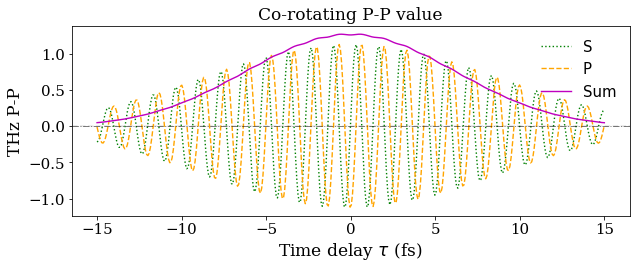

In [3]:
nofont = {'fontname':'serif'}
Size = 15
plt.figure(figsize=(10,3.5))
DT = linspace(-15, 15, 420)
plt.axhline(0, alpha=0.1, color='black', ls='--')
plot(DT, pp_tds_S, color="green",linewidth=1.4,linestyle=':',label='S')
plot(DT, pp_tds_P, color="orange",linewidth=1.4,linestyle='--',label='P')
plot(DT, pp_tds_P**2 + pp_tds_S**2, color="m",linewidth=1.4,label='Sum')
legend(loc=1, prop={'size': 15},frameon=False)
axhline(y=0,color='black',linestyle='-.',linewidth=1, alpha=0.5)
ax=plt.gca()
for label in (ax.get_xticklabels()):
    label.set_fontname('serif')
for label in (ax.get_yticklabels()):
    label.set_fontname('serif')
plt.tick_params(axis='both', labelsize=Size)
xlabel(r'Time delay $\tau$ (fs)',size=Size+2, **nofont)
ylabel(r'THz P-P',size=Size+2, **nofont)
plt.title("Co-rotating P-P value", size=Size+2, **nofont)

Text(0.5,1,'THz spectrum-P')

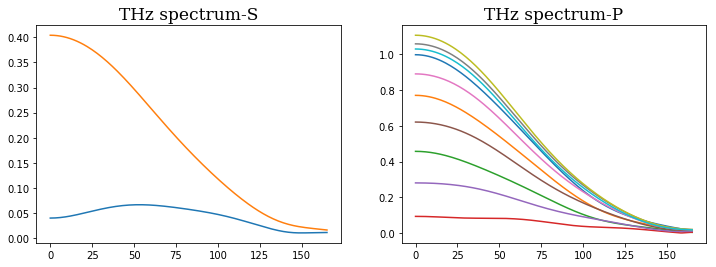

In [4]:
plt.figure(figsize=(12,4))
plt.subplot(121)
for i in range(2):
    plt.plot(np.abs(THz_fre_S[228+i]))
plt.title('THz spectrum-S',size=Size+2, **nofont)
plt.subplot(122)
for i in range(10):
    plt.plot(np.abs(THz_fre_P[220+i]))
plt.title('THz spectrum-P',size=Size+2, **nofont)

(-20, 10)

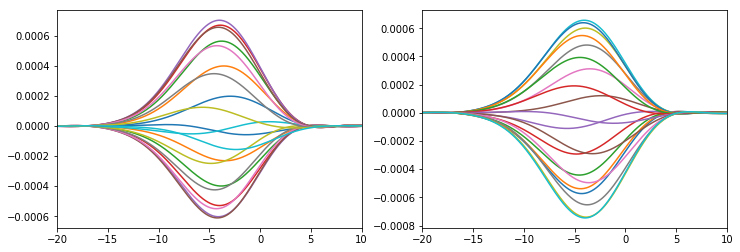

In [10]:
plt.figure(figsize=(12, 4))
plt.subplot(121)
for i in range(20):
    plt.plot(td/41.34, TDS_abs[i,:]*np.cos(TDS_theta[i,:]))
plt.xlim(-20, 10)
plt.subplot(122)
for i in range(20):
    plt.plot(td/41.34, TDS_abs[i,:]*np.sin(TDS_theta[i,:]))
plt.xlim(-20, 10)

(-1.333, 1.333)

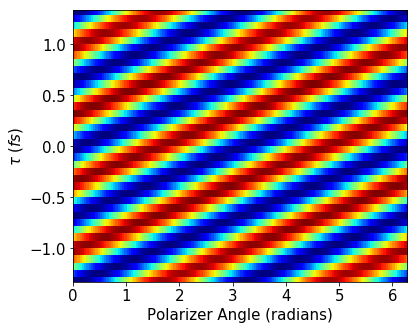

In [6]:
thetas = np.linspace(0, 2*np.pi, 150)
In_theta = []
for theta in thetas:
    In_theta.append((np.array(pp_tds_S)*np.cos(theta) + np.array(pp_tds_P)*np.sin(theta))**2)
plt.figure(figsize=(6,5))
extent = [0, 6.28, -15, 15]
plt.imshow(np.transpose(In_theta), extent=extent,cmap='jet', aspect='auto',origin='lower')
plt.tick_params(axis='both', labelsize=Size)
plt.ylabel(r'$\tau$ ($fs$)', size = Size)
plt.xlabel('Polarizer Angle (radians)', size=Size)
plt.ylim(-1.333*1, 1.333*1)

C:\Users\zhang\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


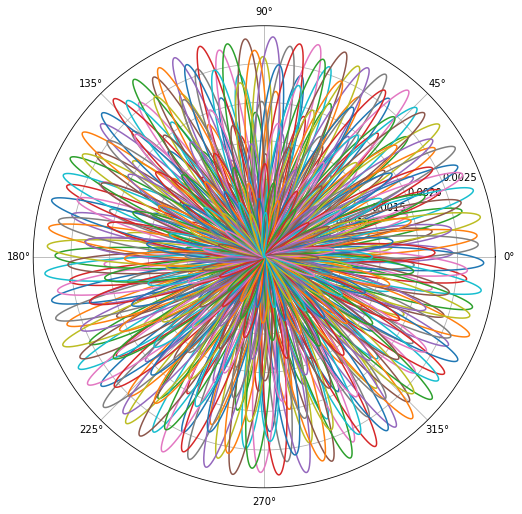

In [7]:
figsize(8.5,8.5)
for i in range(N):   #固定偏振度，改变时间延迟
    subplot(111,polar=True)
    plot(TDS_theta[i,:],TDS_abs[i,:],linewidth=1.5)